In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set Up Parameters

In [2]:
# parameters
S0 = 87
N = 12 ** 6 #Initial number of stocks
T = 1; 
k = 1e-4;
b = 1e-4
M = 1000;    #Number of trading times
alpha = 0.1; 
phi = 0.01;
sigma = 1.06;

In [3]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));
gamma

10.0

In [4]:
xi

1.020212228398181

In [5]:
tt = np.linspace(0, 1, M + 1)

# Optimal Trading Speed and Inventory Process

In [6]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

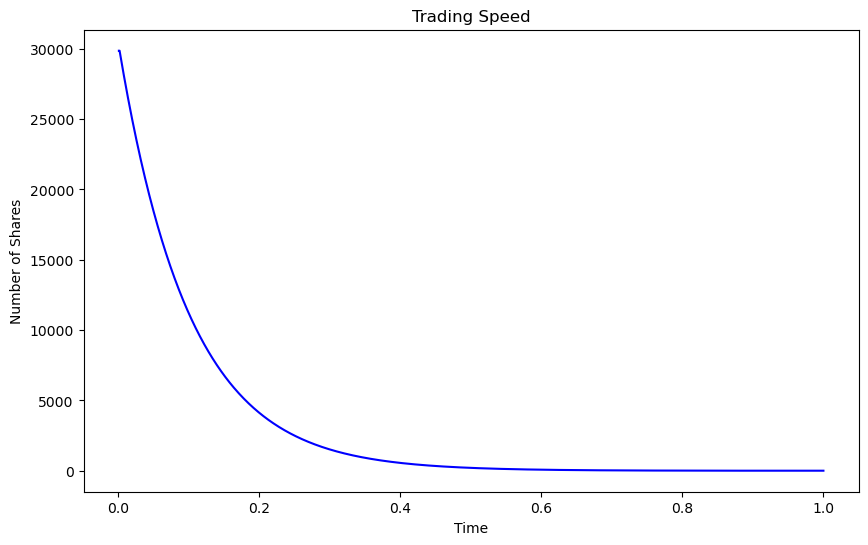

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

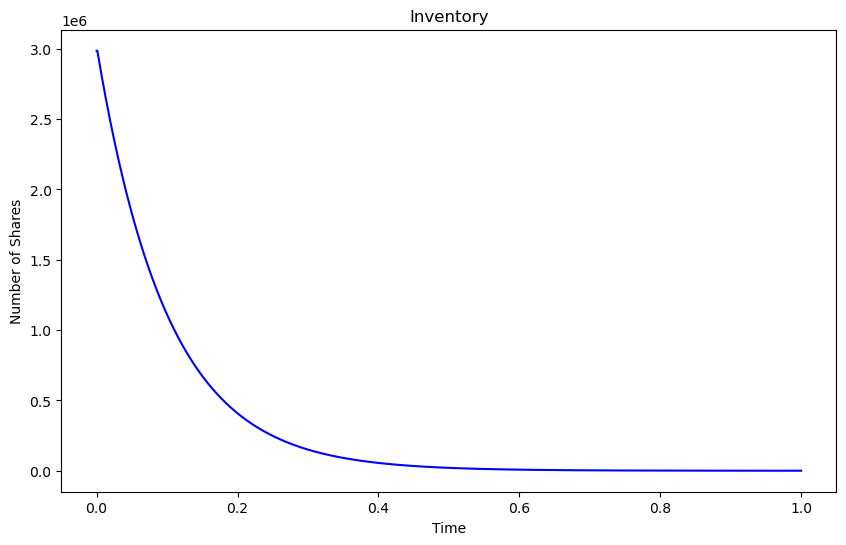

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

# Stock price simulation and plot

In [9]:
S = np.zeros((M + 1, 1))
S[0] = S0 
rn = np.random.standard_normal(S.shape) 
for t in range(1, M + 1): 
    S[t] = S[t-1] - b * v[t] * T/M + sigma * np.sqrt(T/M) * rn[t]

Text(0.5, 1.0, 'Stock Price')

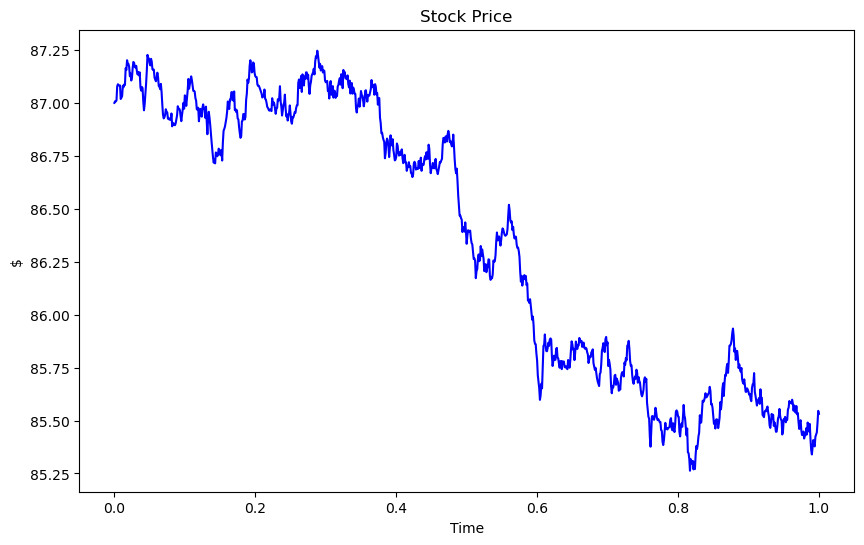

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

# Revenue Process

In [11]:
R = np.zeros((M + 1, 1))
R[0] = 0
for t in range(1, M + 1): 
    R[t] = R[t-1] +  (S[t] - k * v[t]) * v[t]

Text(0.5, 1.0, 'Revenue')

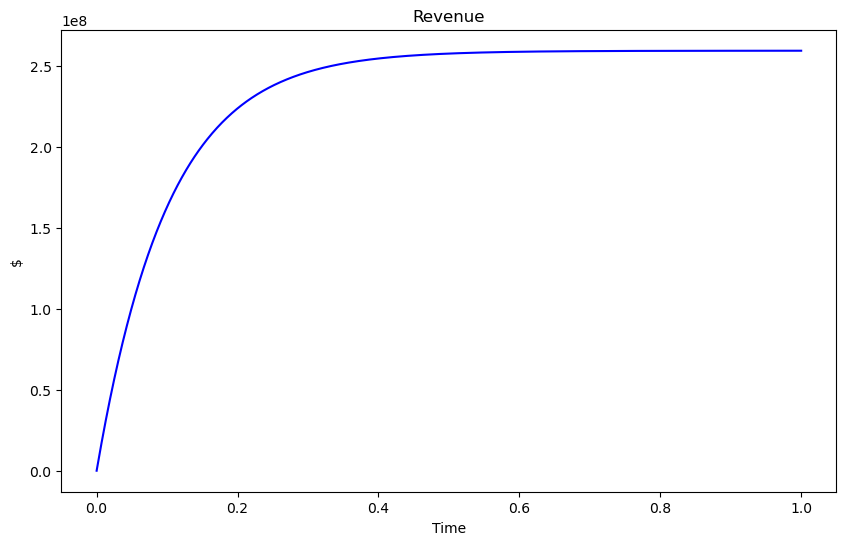

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(tt, R, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Revenue')

In [13]:
pip install import_ipynb

Note: you may need to restart the kernel to use updated packages.


In [14]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

importing Jupyter notebook from Liquidation_Permanent_Price_Impact_helper.ipynb


In [15]:
# Parameter settings
T = 1
Ndt = 12 ** 6
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 1e-4;
b = 1e-4

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 0.01

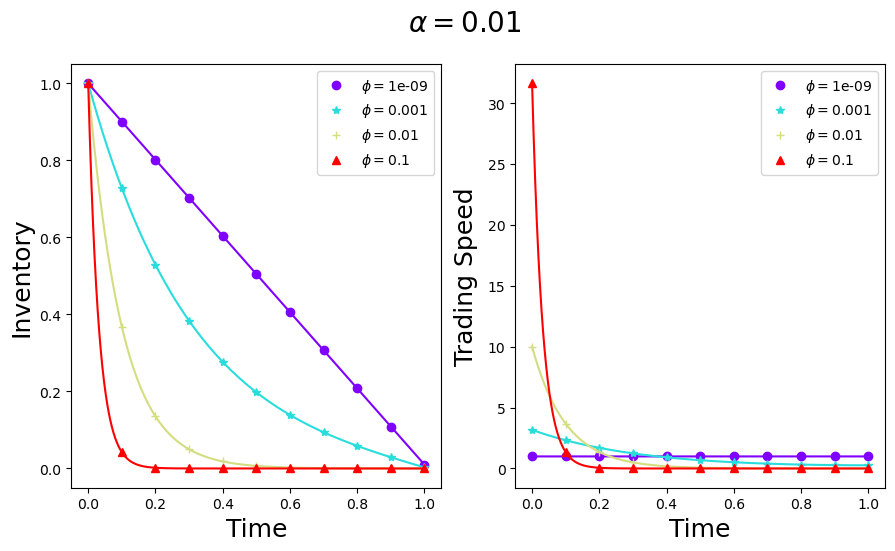

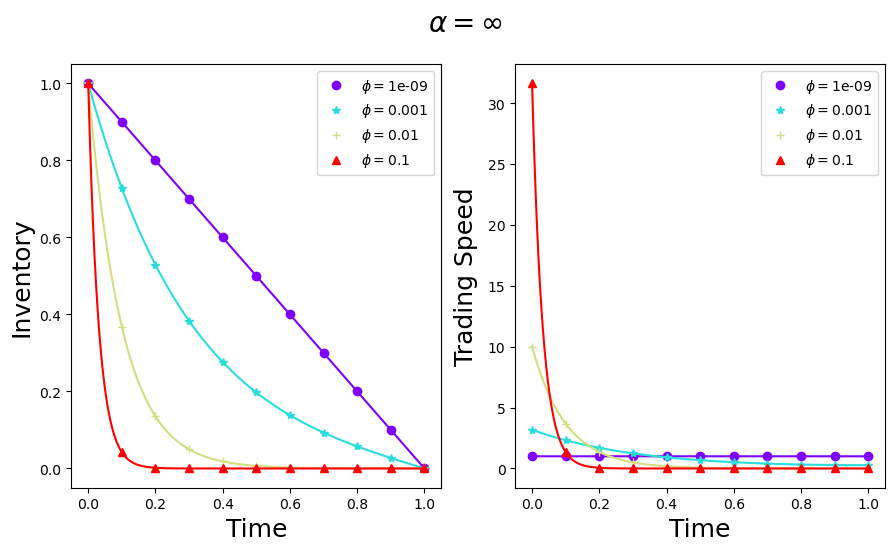

In [16]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = \infty$")